## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [0]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [0]:
from sklearn.datasets import load_boston

데이터 로드

In [0]:
data = load_boston()

In [0]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [0]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [0]:
df['MEDV'] = data['target']

In [0]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

train / test 데이터를 분할 합니다.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [0]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [0]:
x_train.head()

CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
180   0.06588   0.0   2.46   0.0  0.488  ...   3.0  193.0     17.8  395.56   7.56
168   2.30040   0.0  19.58   0.0  0.605  ...   5.0  403.0     14.7  297.09  11.10
440  22.05110   0.0  18.10   0.0  0.740  ...  24.0  666.0     20.2  391.45  22.11
342   0.02498   0.0   1.89   0.0  0.518  ...   1.0  422.0     15.9  389.96   8.65
341   0.01301  35.0   1.52   0.0  0.442  ...   1.0  284.0     15.5  394.74   5.49

[5 rows x 13 columns]

In [0]:
y_train.head()

180    39.8
168    23.8
440    10.5
342    16.5
341    32.7
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [0]:
import numpy as np

In [0]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [0]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [0]:
my_mse(pred, actual)

4.0

In [0]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [0]:
my_mae(pred, actual)

2.0

In [0]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [0]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [0]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [0]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
pred = model.predict(x_test)

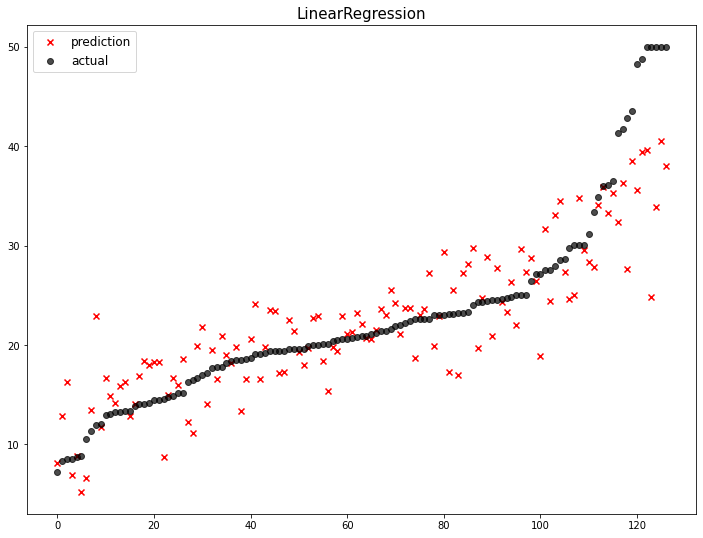

              model        mse
0  LinearRegression  25.129814


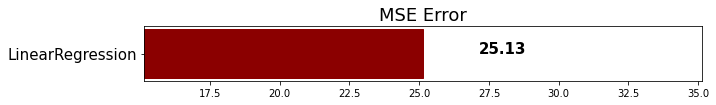

In [0]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [0]:
from sklearn.linear_model import Ridge

In [0]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

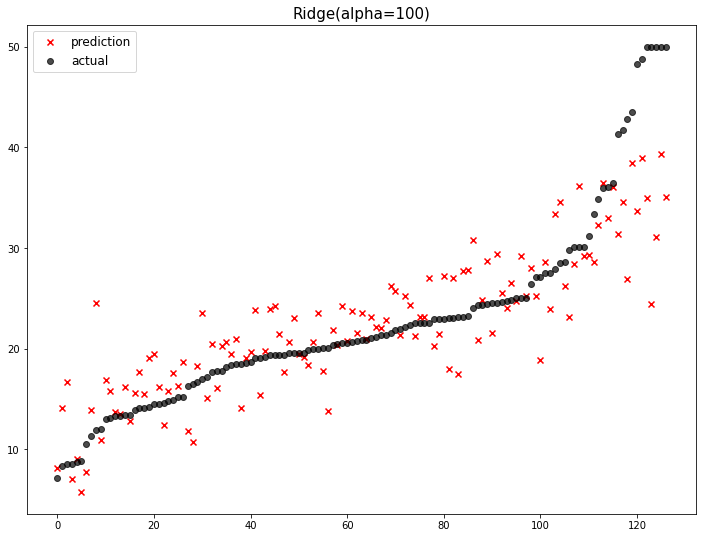

              model        mse
0  Ridge(alpha=100)  29.236838
1  LinearRegression  25.129814


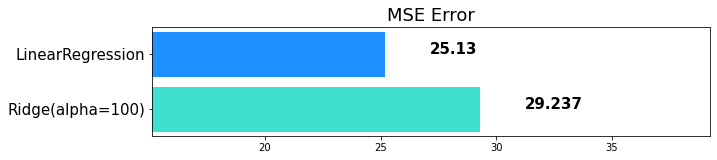

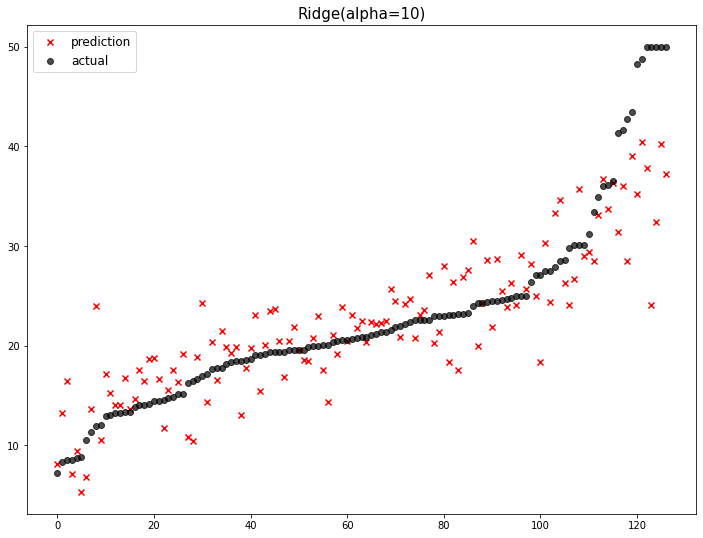

              model        mse
0  Ridge(alpha=100)  29.236838
1   Ridge(alpha=10)  26.271048
2  LinearRegression  25.129814


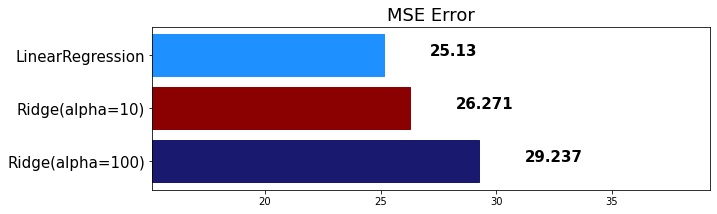

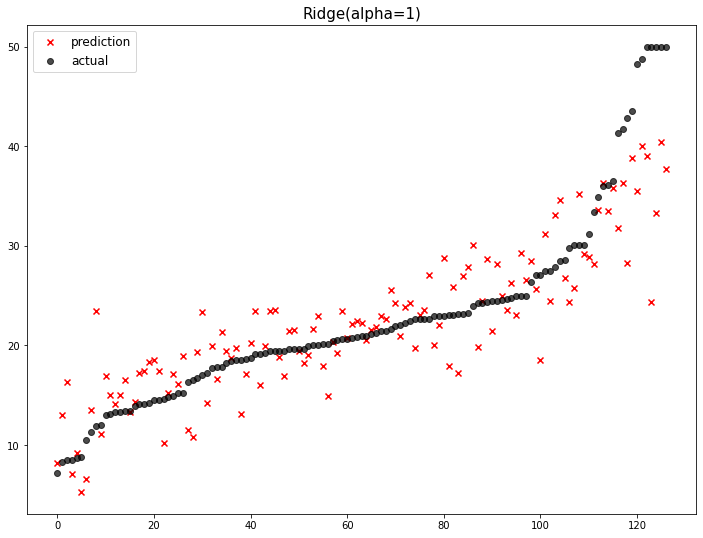

              model        mse
0  Ridge(alpha=100)  29.236838
1   Ridge(alpha=10)  26.271048
2    Ridge(alpha=1)  25.274930
3  LinearRegression  25.129814


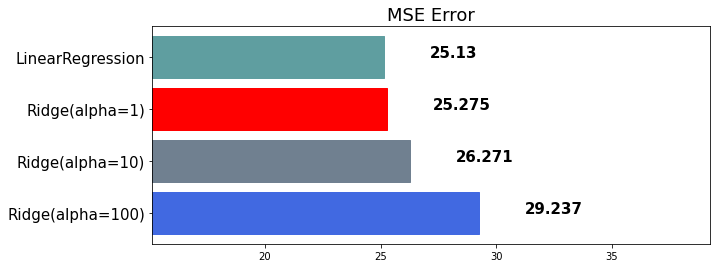

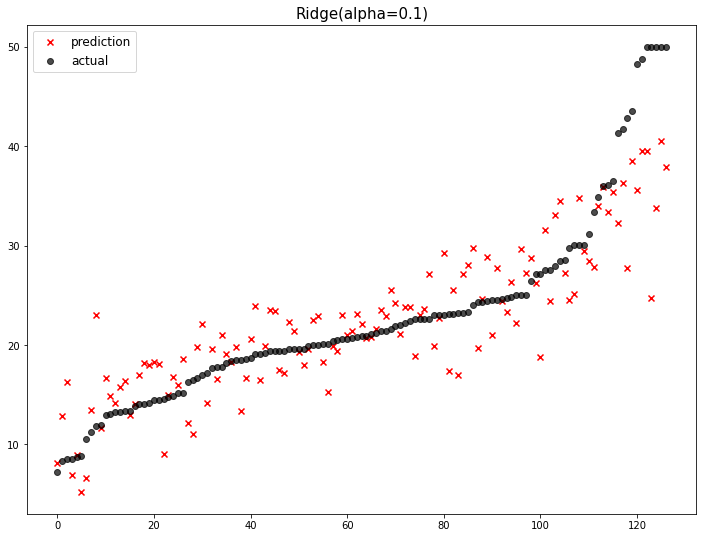

              model        mse
0  Ridge(alpha=100)  29.236838
1   Ridge(alpha=10)  26.271048
2    Ridge(alpha=1)  25.274930
3  LinearRegression  25.129814
4  Ridge(alpha=0.1)  25.113636


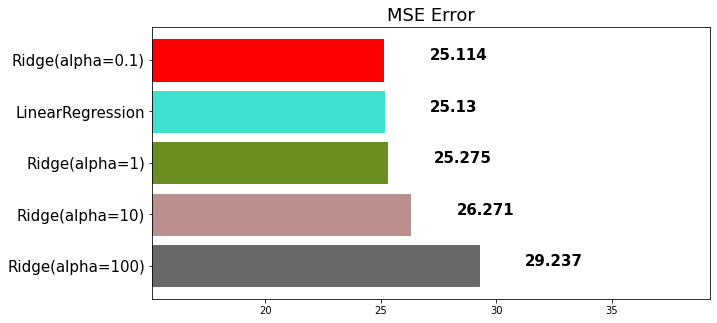

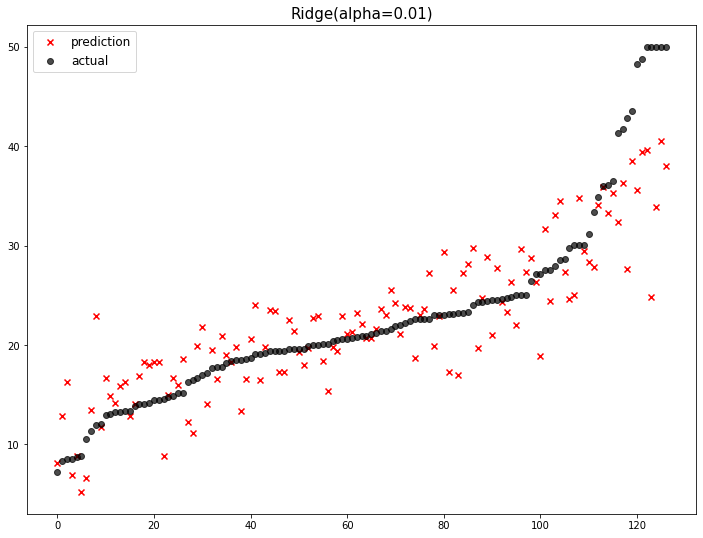

               model        mse
0   Ridge(alpha=100)  29.236838
1    Ridge(alpha=10)  26.271048
2     Ridge(alpha=1)  25.274930
3   LinearRegression  25.129814
4  Ridge(alpha=0.01)  25.127272
5   Ridge(alpha=0.1)  25.113636


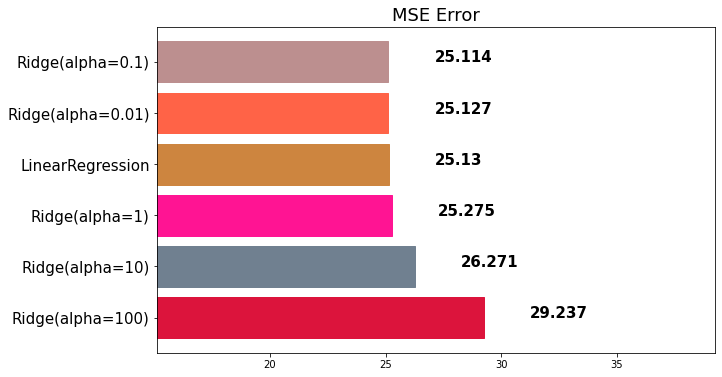

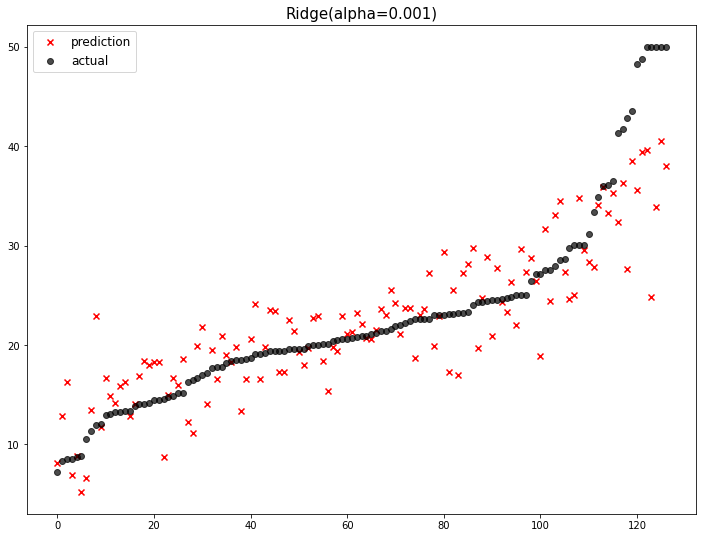

                model        mse
0    Ridge(alpha=100)  29.236838
1     Ridge(alpha=10)  26.271048
2      Ridge(alpha=1)  25.274930
3    LinearRegression  25.129814
4  Ridge(alpha=0.001)  25.129549
5   Ridge(alpha=0.01)  25.127272
6    Ridge(alpha=0.1)  25.113636


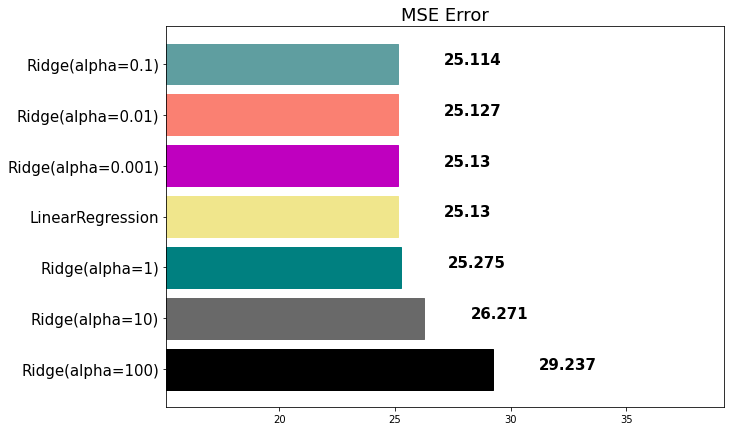

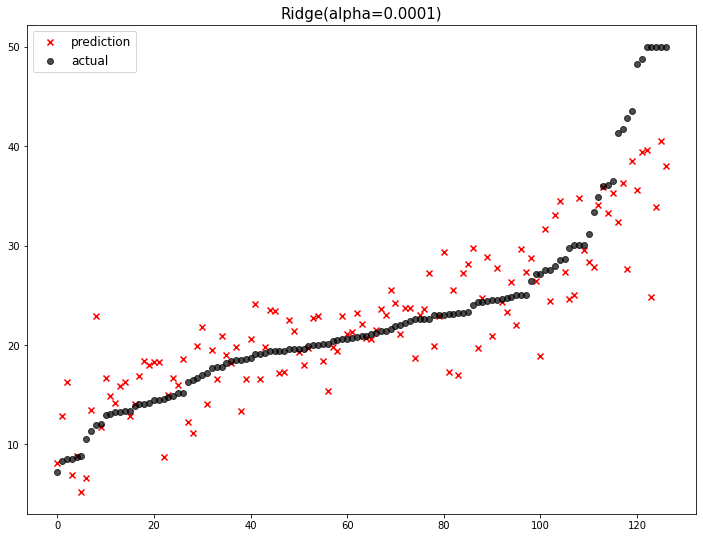

                 model        mse
0     Ridge(alpha=100)  29.236838
1      Ridge(alpha=10)  26.271048
2       Ridge(alpha=1)  25.274930
3     LinearRegression  25.129814
4  Ridge(alpha=0.0001)  25.129787
5   Ridge(alpha=0.001)  25.129549
6    Ridge(alpha=0.01)  25.127272
7     Ridge(alpha=0.1)  25.113636


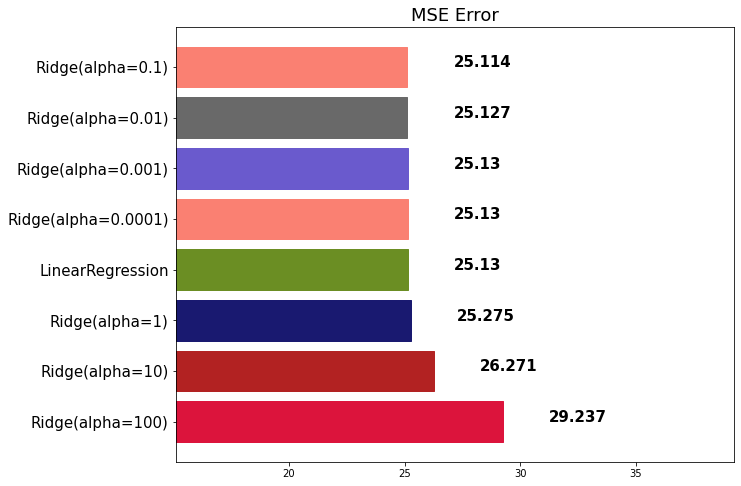

In [0]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [0]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [0]:
ridge.coef_

array([ -0.12934718,   0.06495699,   0.00671416,   2.66806255,
       -18.95585523,   2.98128283,   0.00043067,  -1.716681  ,
         0.32056077,  -0.01449266,  -0.8564152 ,   0.00732588,
        -0.53370681])

In [0]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

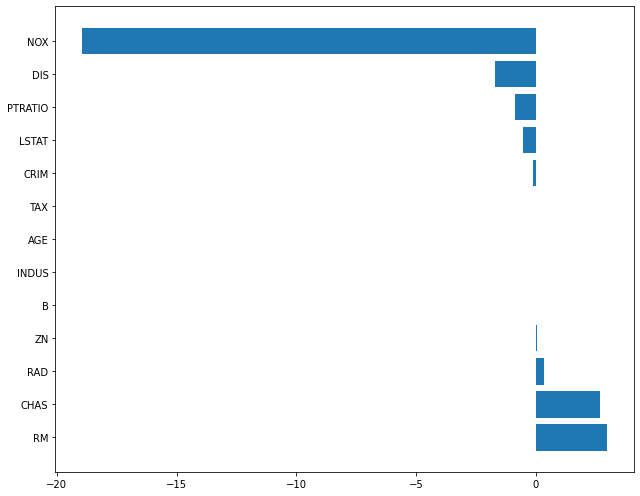

In [0]:
plot_coef(x_train.columns, ridge.coef_)

alpha 값에 따른 coef 의 차이를 확인해 봅시다

In [0]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

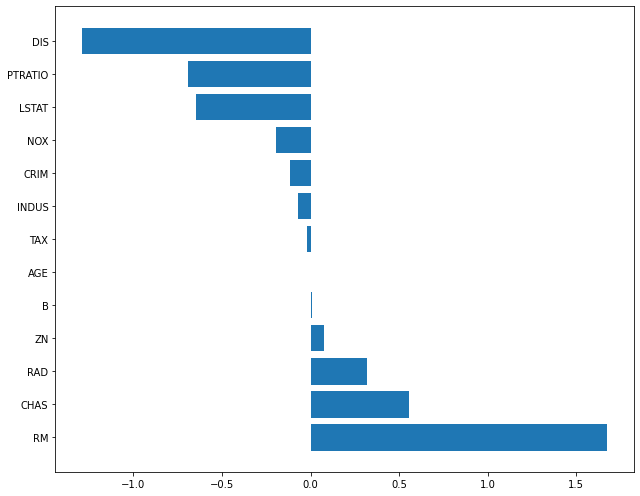

In [0]:
plot_coef(x_train.columns, ridge_100.coef_)

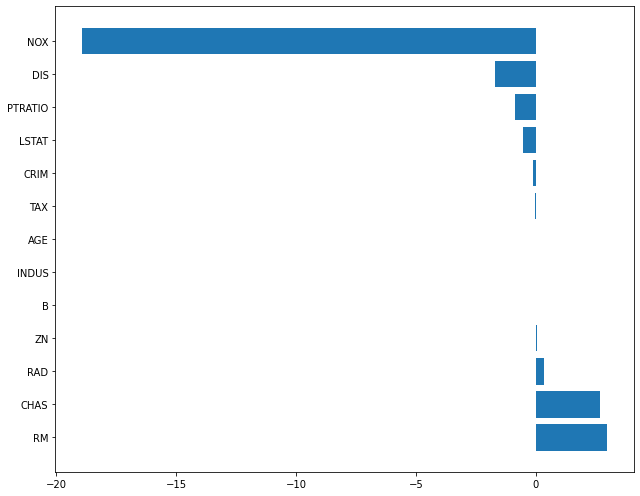

In [0]:
plot_coef(x_train.columns, ridge_001.coef_)

In [0]:
from sklearn.linear_model import Lasso

In [0]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

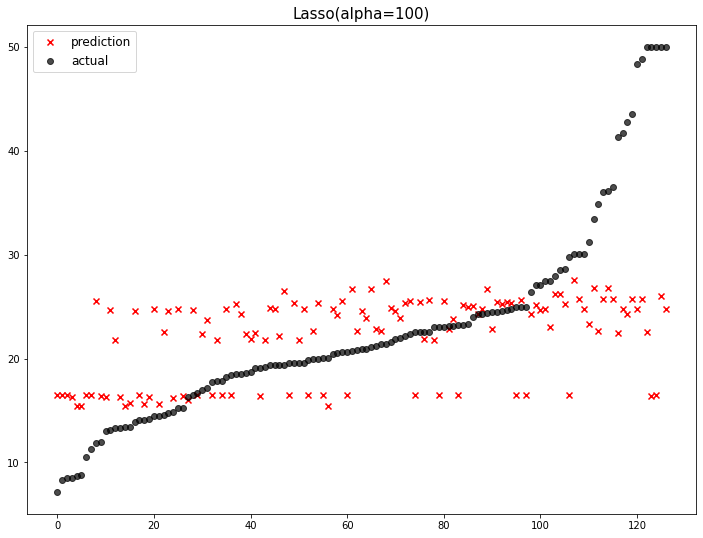

                 model        mse
0     Lasso(alpha=100)  78.644840
1     Ridge(alpha=100)  29.236838
2      Ridge(alpha=10)  26.271048
3       Ridge(alpha=1)  25.274930
4     LinearRegression  25.129814
5  Ridge(alpha=0.0001)  25.129787
6   Ridge(alpha=0.001)  25.129549
7    Ridge(alpha=0.01)  25.127272
8     Ridge(alpha=0.1)  25.113636


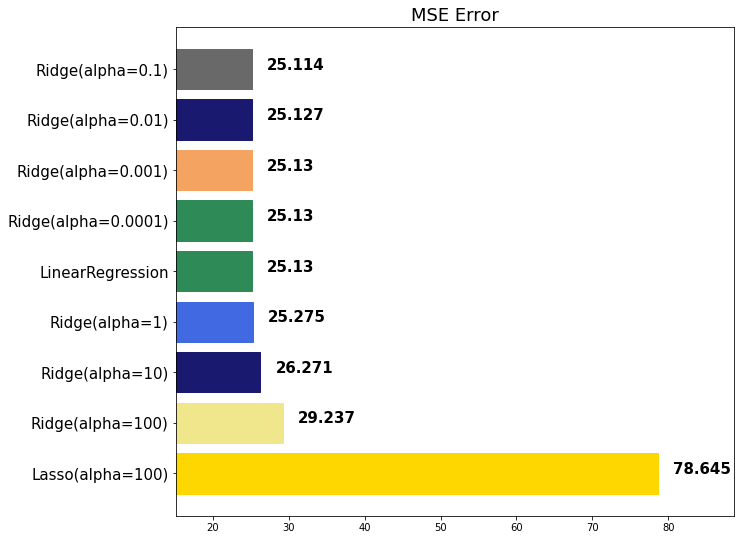

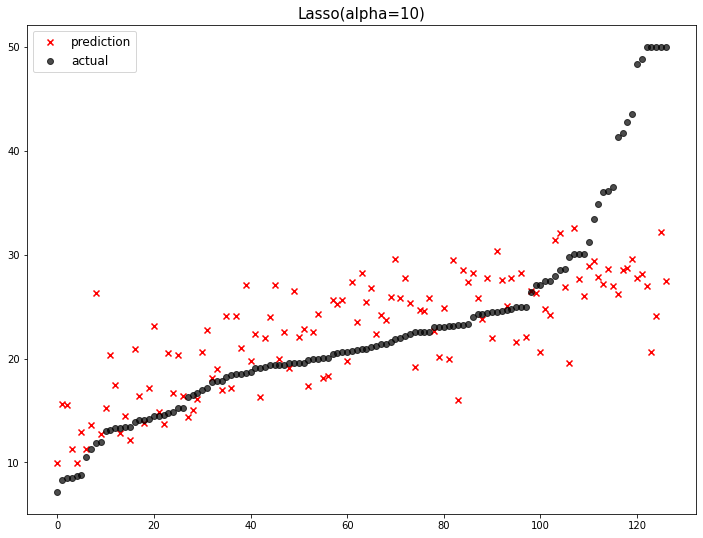

                 model        mse
0     Lasso(alpha=100)  78.644840
1      Lasso(alpha=10)  53.458274
2     Ridge(alpha=100)  29.236838
3      Ridge(alpha=10)  26.271048
4       Ridge(alpha=1)  25.274930
5     LinearRegression  25.129814
6  Ridge(alpha=0.0001)  25.129787
7   Ridge(alpha=0.001)  25.129549
8    Ridge(alpha=0.01)  25.127272
9     Ridge(alpha=0.1)  25.113636


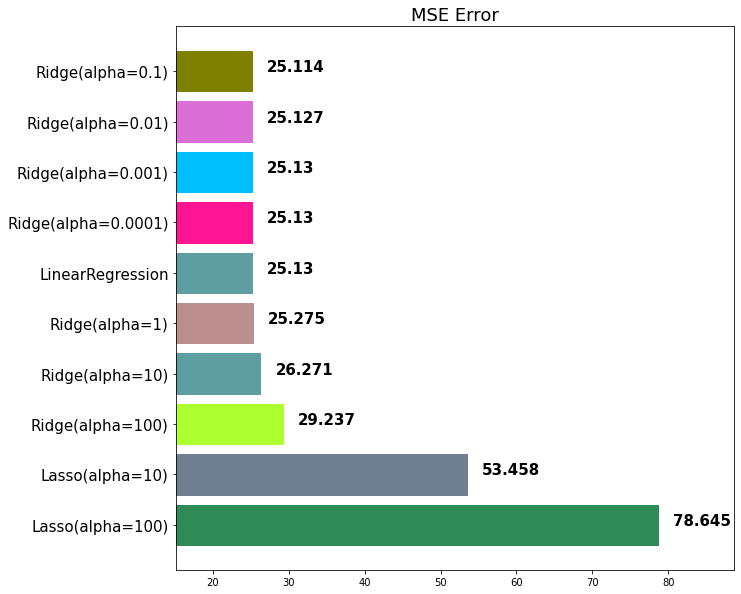

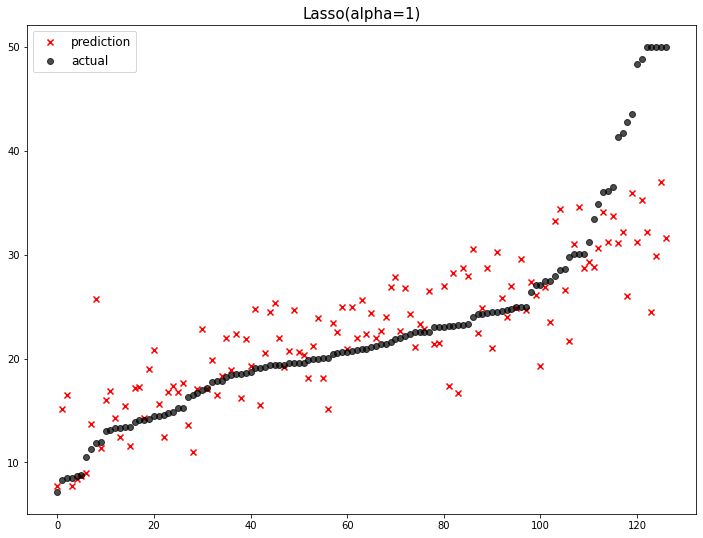

                  model        mse
0      Lasso(alpha=100)  78.644840
1       Lasso(alpha=10)  53.458274
2        Lasso(alpha=1)  35.348292
3      Ridge(alpha=100)  29.236838
4       Ridge(alpha=10)  26.271048
5        Ridge(alpha=1)  25.274930
6      LinearRegression  25.129814
7   Ridge(alpha=0.0001)  25.129787
8    Ridge(alpha=0.001)  25.129549
9     Ridge(alpha=0.01)  25.127272
10     Ridge(alpha=0.1)  25.113636


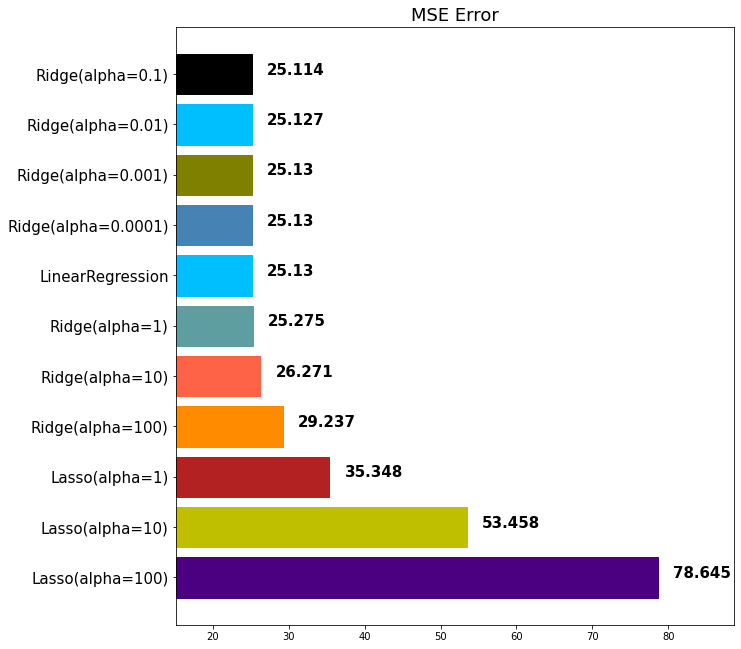

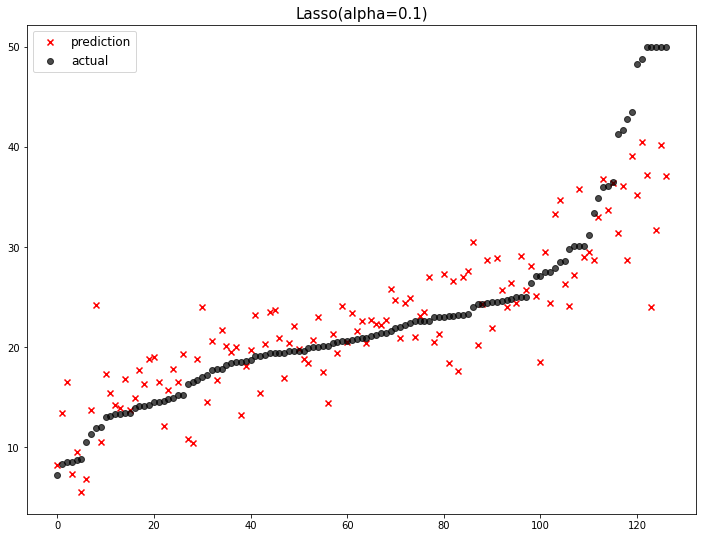

                  model        mse
0      Lasso(alpha=100)  78.644840
1       Lasso(alpha=10)  53.458274
2        Lasso(alpha=1)  35.348292
3      Ridge(alpha=100)  29.236838
4      Lasso(alpha=0.1)  26.611561
5       Ridge(alpha=10)  26.271048
6        Ridge(alpha=1)  25.274930
7      LinearRegression  25.129814
8   Ridge(alpha=0.0001)  25.129787
9    Ridge(alpha=0.001)  25.129549
10    Ridge(alpha=0.01)  25.127272
11     Ridge(alpha=0.1)  25.113636


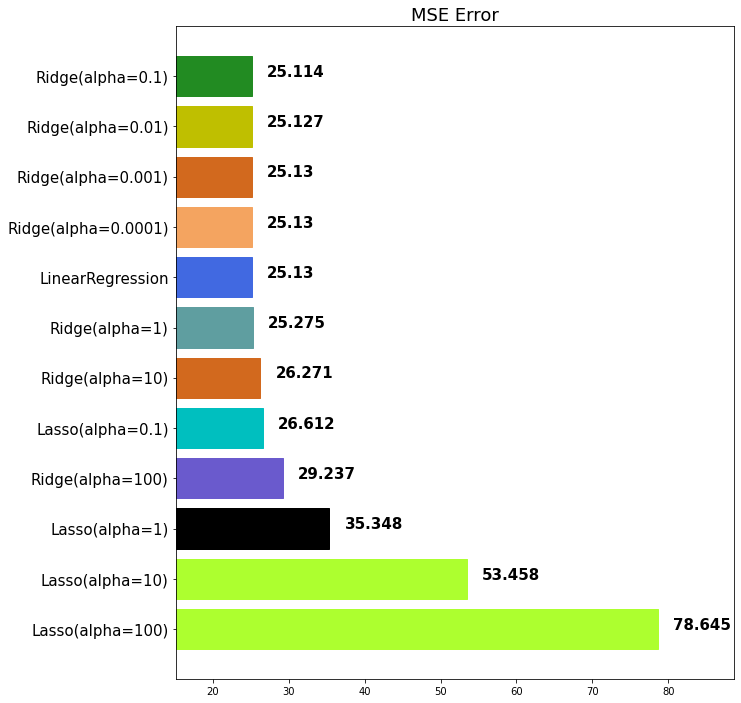

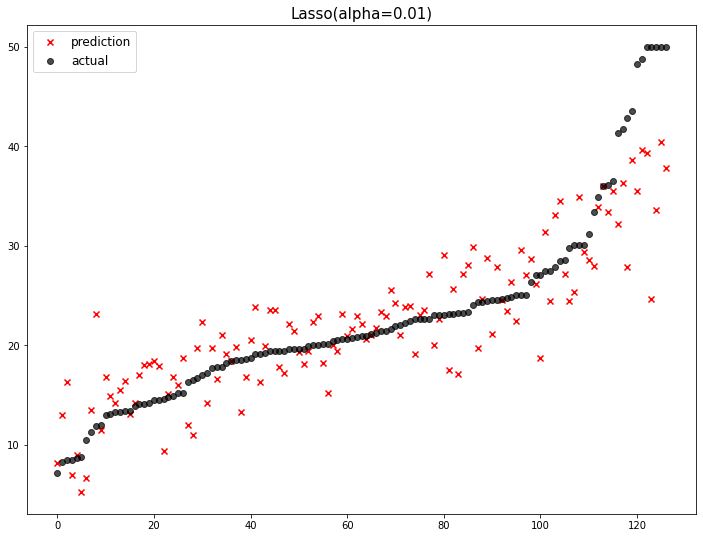

                  model        mse
0      Lasso(alpha=100)  78.644840
1       Lasso(alpha=10)  53.458274
2        Lasso(alpha=1)  35.348292
3      Ridge(alpha=100)  29.236838
4      Lasso(alpha=0.1)  26.611561
5       Ridge(alpha=10)  26.271048
6        Ridge(alpha=1)  25.274930
7     Lasso(alpha=0.01)  25.158275
8      LinearRegression  25.129814
9   Ridge(alpha=0.0001)  25.129787
10   Ridge(alpha=0.001)  25.129549
11    Ridge(alpha=0.01)  25.127272
12     Ridge(alpha=0.1)  25.113636


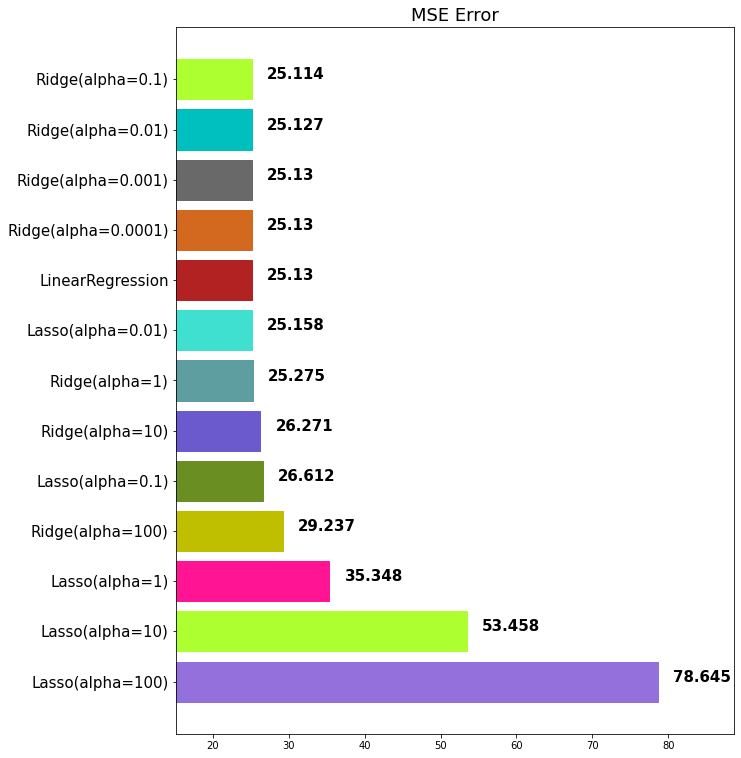

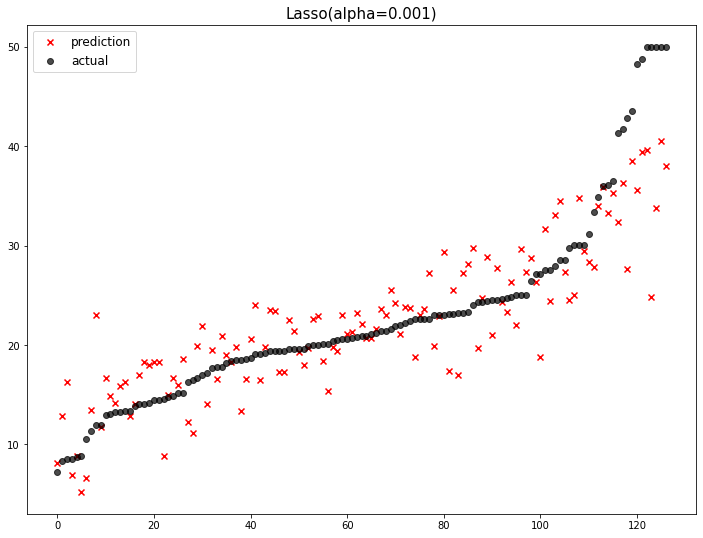

                  model        mse
0      Lasso(alpha=100)  78.644840
1       Lasso(alpha=10)  53.458274
2        Lasso(alpha=1)  35.348292
3      Ridge(alpha=100)  29.236838
4      Lasso(alpha=0.1)  26.611561
5       Ridge(alpha=10)  26.271048
6        Ridge(alpha=1)  25.274930
7     Lasso(alpha=0.01)  25.158275
8      LinearRegression  25.129814
9   Ridge(alpha=0.0001)  25.129787
10   Ridge(alpha=0.001)  25.129549
11   Lasso(alpha=0.001)  25.129406
12    Ridge(alpha=0.01)  25.127272
13     Ridge(alpha=0.1)  25.113636


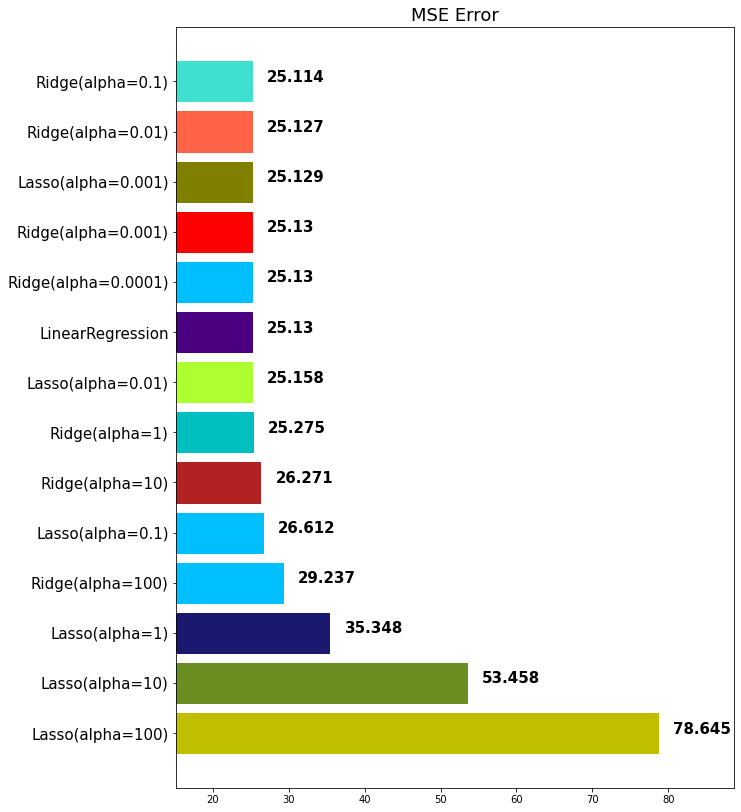

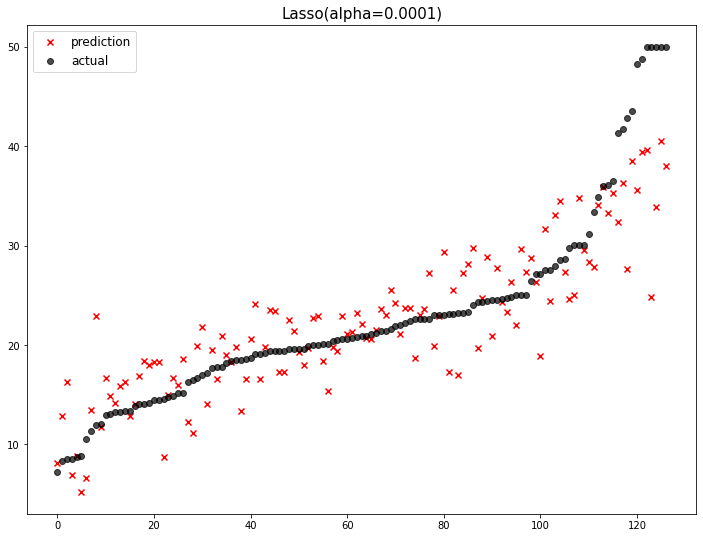

                  model        mse
0      Lasso(alpha=100)  78.644840
1       Lasso(alpha=10)  53.458274
2        Lasso(alpha=1)  35.348292
3      Ridge(alpha=100)  29.236838
4      Lasso(alpha=0.1)  26.611561
5       Ridge(alpha=10)  26.271048
6        Ridge(alpha=1)  25.274930
7     Lasso(alpha=0.01)  25.158275
8      LinearRegression  25.129814
9   Ridge(alpha=0.0001)  25.129787
10  Lasso(alpha=0.0001)  25.129737
11   Ridge(alpha=0.001)  25.129549
12   Lasso(alpha=0.001)  25.129406
13    Ridge(alpha=0.01)  25.127272
14     Ridge(alpha=0.1)  25.113636


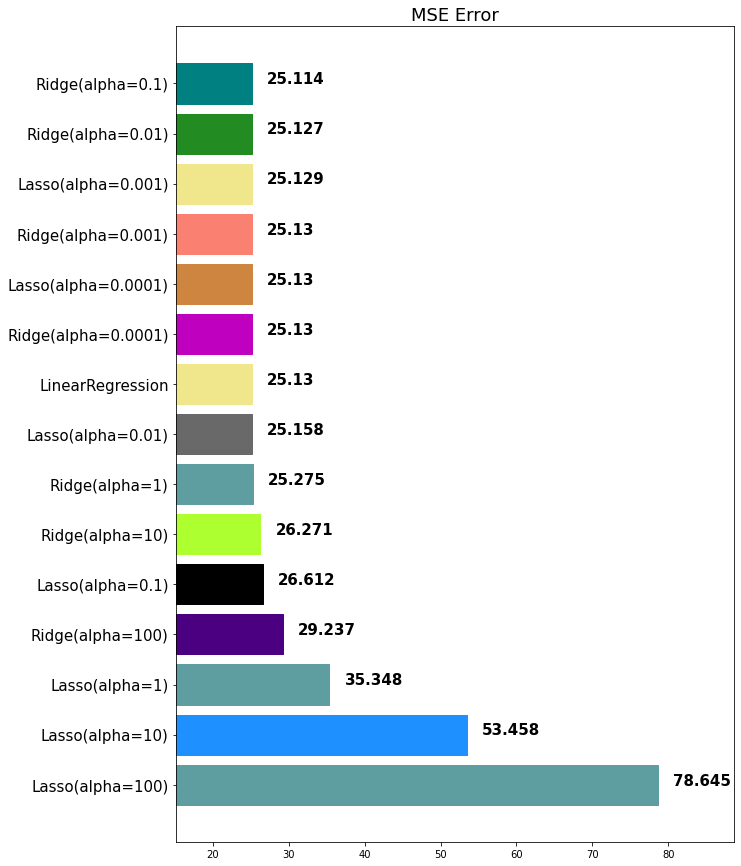

In [0]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [0]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

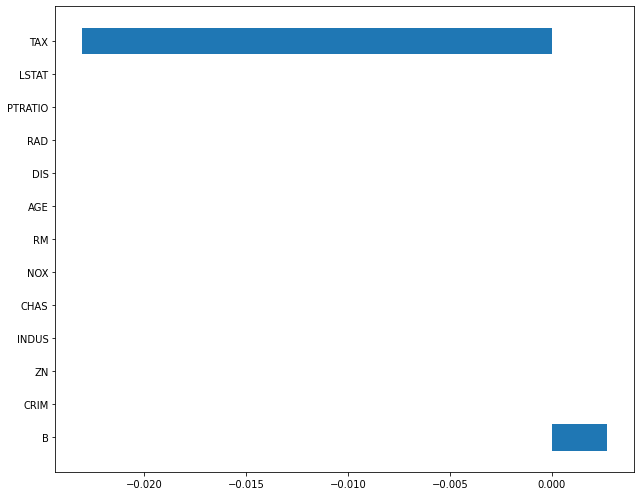

In [0]:
plot_coef(x_train.columns, lasso_100.coef_)

In [0]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02306651,
       -0.        ,  0.00271496, -0.        ])

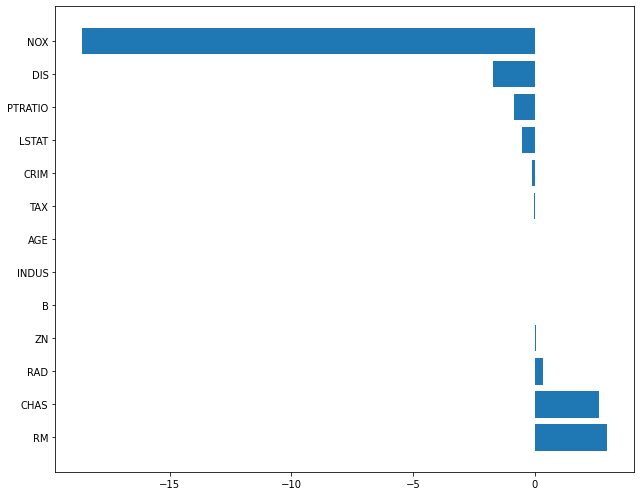

In [0]:
plot_coef(x_train.columns, lasso_001.coef_)

In [0]:
lasso_001.coef_

array([ -0.12917321,   0.06504872,   0.00512375,   2.6515016 ,
       -18.61205761,   2.98149349,   0.00016926,  -1.71181198,
         0.31973993,  -0.01452793,  -0.8523832 ,   0.00733997,
        -0.53417737])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [0]:
from sklearn.linear_model import ElasticNet

In [0]:
ratios = [0.2, 0.5, 0.8]

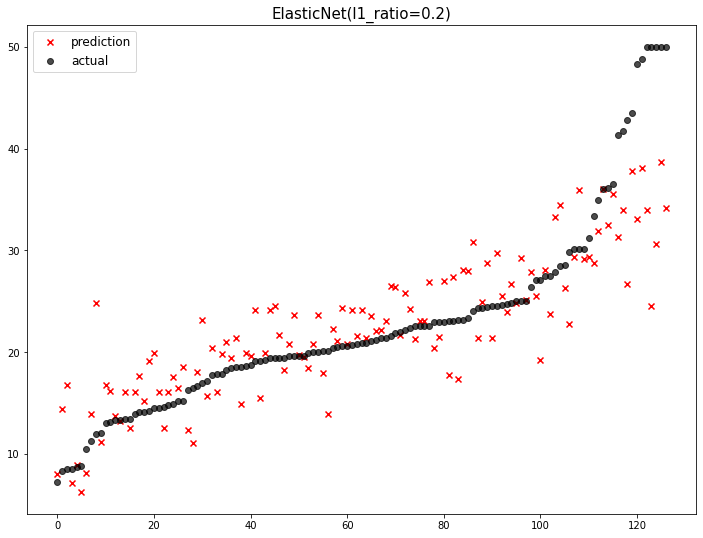

                       model        mse
0           Lasso(alpha=100)  78.644840
1            Lasso(alpha=10)  53.458274
2             Lasso(alpha=1)  35.348292
3   ElasticNet(l1_ratio=0.2)  30.665115
4           Ridge(alpha=100)  29.236838
5           Lasso(alpha=0.1)  26.611561
6            Ridge(alpha=10)  26.271048
7             Ridge(alpha=1)  25.274930
8          Lasso(alpha=0.01)  25.158275
9           LinearRegression  25.129814
10       Ridge(alpha=0.0001)  25.129787
11       Lasso(alpha=0.0001)  25.129737
12        Ridge(alpha=0.001)  25.129549
13        Lasso(alpha=0.001)  25.129406
14         Ridge(alpha=0.01)  25.127272
15          Ridge(alpha=0.1)  25.113636


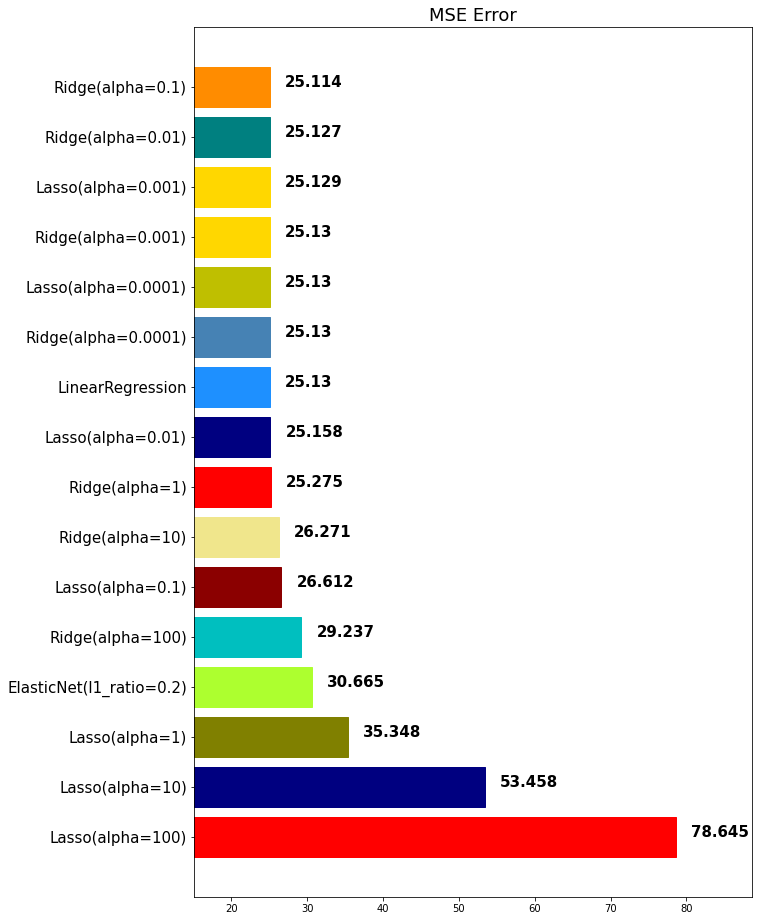

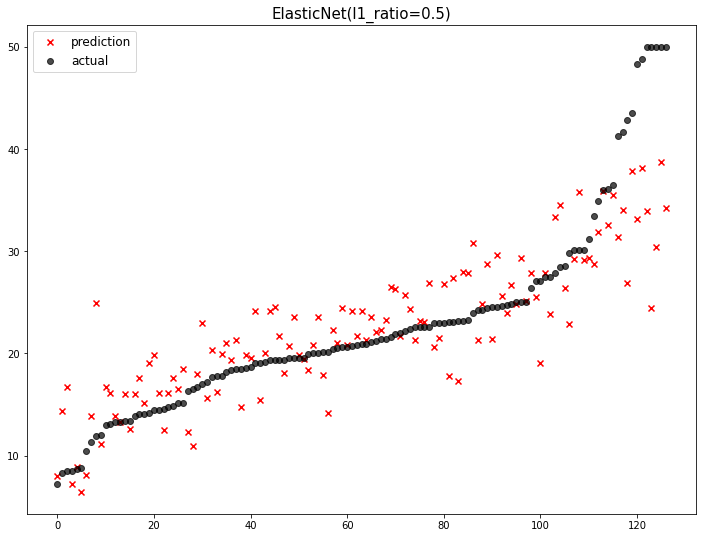

                       model        mse
0           Lasso(alpha=100)  78.644840
1            Lasso(alpha=10)  53.458274
2             Lasso(alpha=1)  35.348292
3   ElasticNet(l1_ratio=0.2)  30.665115
4   ElasticNet(l1_ratio=0.5)  30.556287
5           Ridge(alpha=100)  29.236838
6           Lasso(alpha=0.1)  26.611561
7            Ridge(alpha=10)  26.271048
8             Ridge(alpha=1)  25.274930
9          Lasso(alpha=0.01)  25.158275
10          LinearRegression  25.129814
11       Ridge(alpha=0.0001)  25.129787
12       Lasso(alpha=0.0001)  25.129737
13        Ridge(alpha=0.001)  25.129549
14        Lasso(alpha=0.001)  25.129406
15         Ridge(alpha=0.01)  25.127272
16          Ridge(alpha=0.1)  25.113636


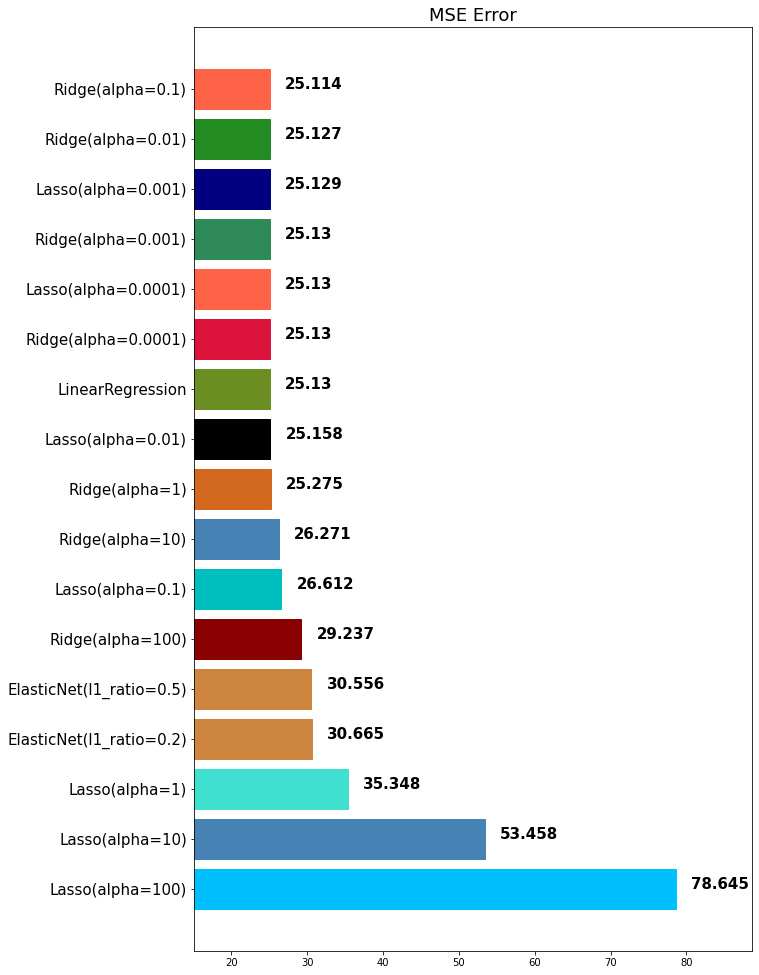

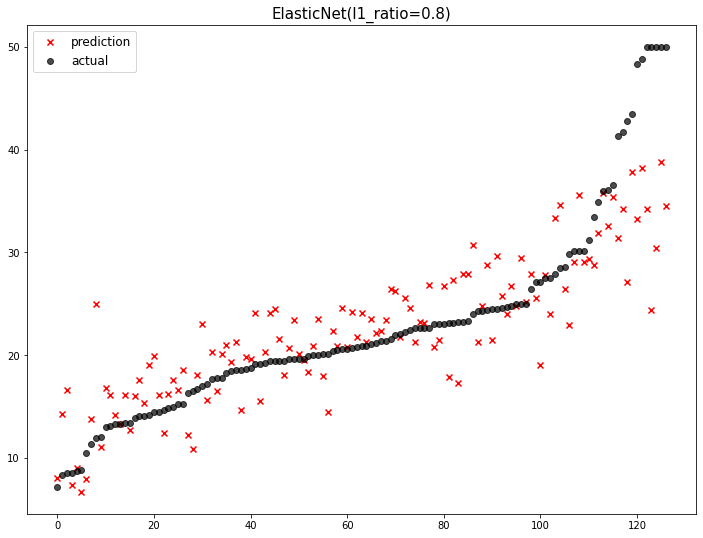

                       model        mse
0           Lasso(alpha=100)  78.644840
1            Lasso(alpha=10)  53.458274
2             Lasso(alpha=1)  35.348292
3   ElasticNet(l1_ratio=0.2)  30.665115
4   ElasticNet(l1_ratio=0.5)  30.556287
5   ElasticNet(l1_ratio=0.8)  30.233078
6           Ridge(alpha=100)  29.236838
7           Lasso(alpha=0.1)  26.611561
8            Ridge(alpha=10)  26.271048
9             Ridge(alpha=1)  25.274930
10         Lasso(alpha=0.01)  25.158275
11          LinearRegression  25.129814
12       Ridge(alpha=0.0001)  25.129787
13       Lasso(alpha=0.0001)  25.129737
14        Ridge(alpha=0.001)  25.129549
15        Lasso(alpha=0.001)  25.129406
16         Ridge(alpha=0.01)  25.127272
17          Ridge(alpha=0.1)  25.113636


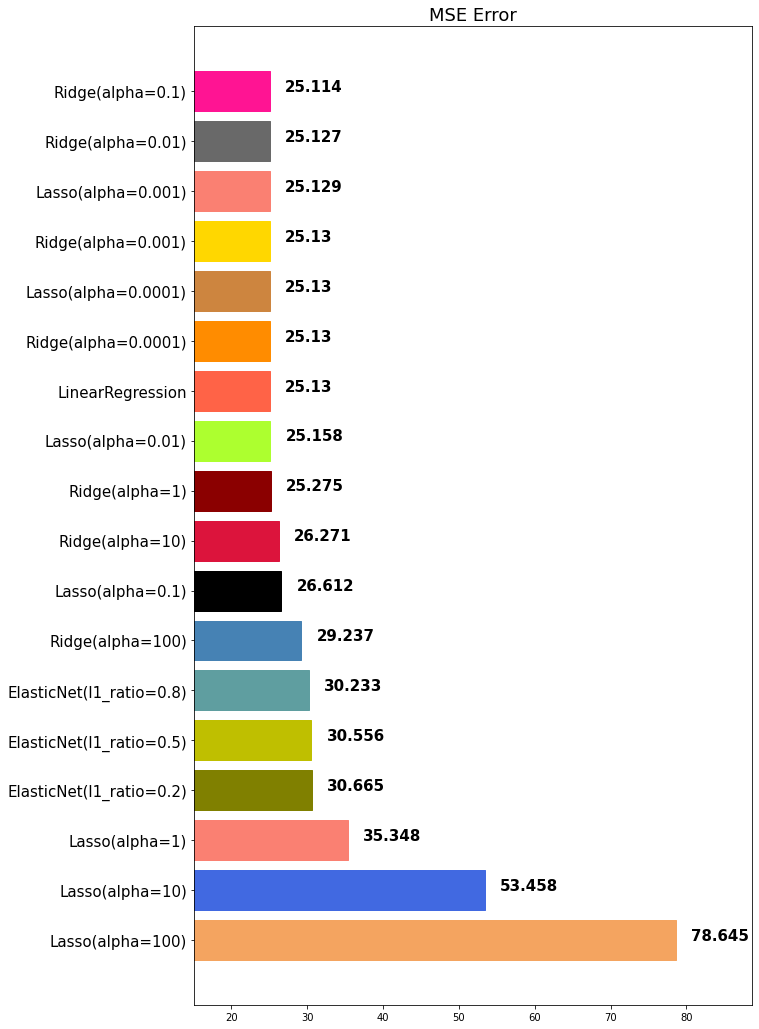

In [0]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [0]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

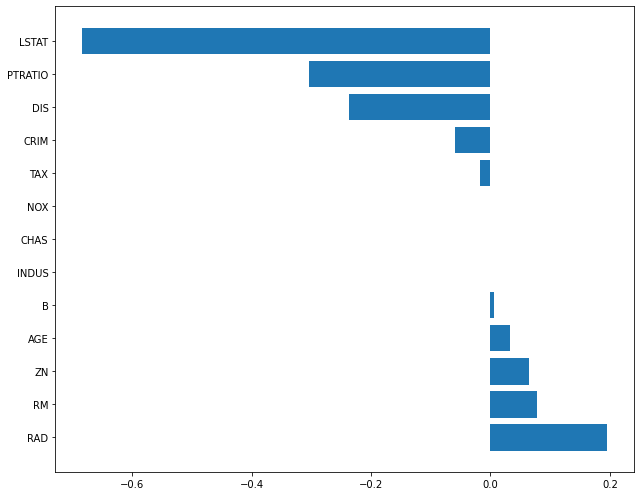

In [0]:
plot_coef(x_train.columns, elsticnet_20.coef_)

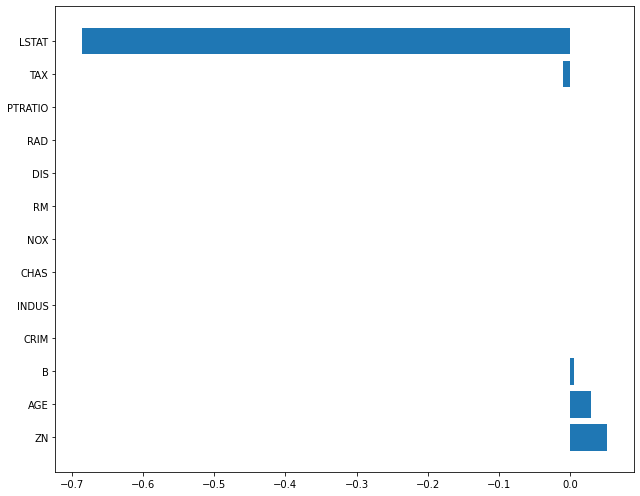

In [0]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [0]:
elsticnet_80.coef_

array([-0.        ,  0.05193535, -0.        ,  0.        ,  0.        ,
        0.        ,  0.0292694 , -0.        ,  0.        , -0.01011718,
       -0.        ,  0.00479291, -0.6859467 ])

## Scaler

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [0]:
x_train.describe()

CRIM          ZN       INDUS  ...     PTRATIO           B       LSTAT
count  379.000000  379.000000  379.000000  ...  379.000000  379.000000  379.000000
mean     3.553525   11.534301   10.980818  ...   18.376517  353.795303   12.781055
std      8.536186   23.691221    6.938332  ...    2.163111   95.559829    7.341511
min      0.009060    0.000000    0.740000  ...   12.600000    2.520000    1.730000
25%      0.079230    0.000000    4.940000  ...   16.950000  374.570000    6.750000
50%      0.224890    0.000000    8.560000  ...   18.700000  391.340000   11.480000
75%      3.242325   12.500000   18.100000  ...   20.200000  395.960000   16.950000
max     88.976200  100.000000   27.740000  ...   22.000000  396.900000   37.970000

[8 rows x 13 columns]

### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [0]:
std_scaler = StandardScaler()

In [0]:
std_scaled = std_scaler.fit_transform(x_train)

In [0]:
round(pd.DataFrame(std_scaled).describe(), 2)

0       1       2       3   ...      9       10      11      12
count  379.00  379.00  379.00  379.00  ...  379.00  379.00  379.00  379.00
mean    -0.00   -0.00    0.00    0.00  ...   -0.00    0.00    0.00   -0.00
std      1.00    1.00    1.00    1.00  ...    1.00    1.00    1.00    1.00
min     -0.42   -0.49   -1.48   -0.29  ...   -1.28   -2.67   -3.68   -1.51
25%     -0.41   -0.49   -0.87   -0.29  ...   -0.75   -0.66    0.22   -0.82
50%     -0.39   -0.49   -0.35   -0.29  ...   -0.44    0.15    0.39   -0.18
75%     -0.04    0.04    1.03   -0.29  ...    1.56    0.84    0.44    0.57
max     10.02    3.74    2.42    3.41  ...    1.83    1.68    0.45    3.44

[8 rows x 13 columns]

### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [0]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [0]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

0       1       2       3   ...      9       10      11      12
count  379.00  379.00  379.00  379.00  ...  379.00  379.00  379.00  379.00
mean     0.04    0.12    0.38    0.08  ...    0.41    0.61    0.89    0.30
std      0.10    0.24    0.26    0.27  ...    0.32    0.23    0.24    0.20
min      0.00    0.00    0.00    0.00  ...    0.00    0.00    0.00    0.00
25%      0.00    0.00    0.16    0.00  ...    0.17    0.46    0.94    0.14
50%      0.00    0.00    0.29    0.00  ...    0.27    0.65    0.99    0.27
75%      0.04    0.12    0.64    0.00  ...    0.91    0.81    1.00    0.42
max      1.00    1.00    1.00    1.00  ...    1.00    1.00    1.00    1.00

[8 rows x 13 columns]

### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [0]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [0]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [0]:
from sklearn.pipeline import make_pipeline

In [0]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [0]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

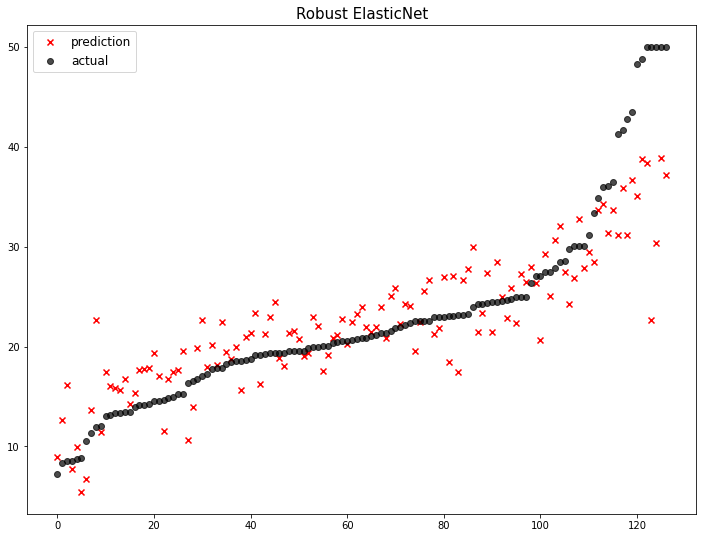

                       model        mse
0           Lasso(alpha=100)  78.644840
1            Lasso(alpha=10)  53.458274
2          MinMax ElasticNet  52.080500
3             Lasso(alpha=1)  35.348292
4   ElasticNet(l1_ratio=0.2)  30.665115
5   ElasticNet(l1_ratio=0.5)  30.556287
6   ElasticNet(l1_ratio=0.8)  30.233078
7           Ridge(alpha=100)  29.236838
8           Lasso(alpha=0.1)  26.611561
9            Ridge(alpha=10)  26.271048
10         Robust ElasticNet  25.960718
11       Standard ElasticNet  25.333287
12    No Standard ElasticNet  25.333287
13            Ridge(alpha=1)  25.274930
14         Lasso(alpha=0.01)  25.158275
15          LinearRegression  25.129814
16       Ridge(alpha=0.0001)  25.129787
17       Lasso(alpha=0.0001)  25.129737
18        Ridge(alpha=0.001)  25.129549
19        Lasso(alpha=0.001)  25.129406
20         Ridge(alpha=0.01)  25.127272
21          Ridge(alpha=0.1)  25.113636


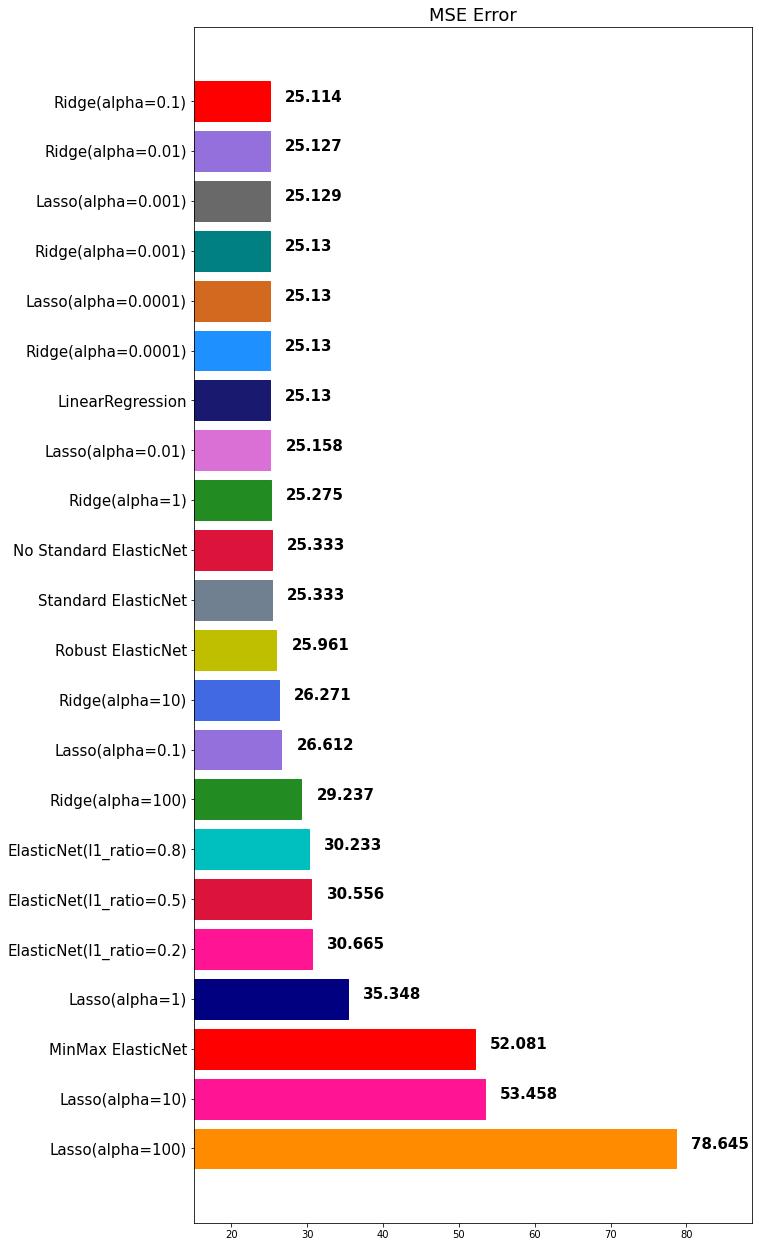

In [0]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

In [0]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [0]:
poly_features = poly.fit_transform(x_train)[0]

In [0]:
poly_features

array([     0.06588   ,      0.        ,      2.46      ,      0.        ,
            0.488     ,      7.765     ,     83.3       ,      2.741     ,
            3.        ,    193.        ,     17.8       ,    395.56      ,
            7.56      ,      0.00434017,      0.        ,      0.1620648 ,
            0.        ,      0.03214944,      0.5115582 ,      5.487804  ,
            0.18057708,      0.19764   ,     12.71484   ,      1.172664  ,
           26.0594928 ,      0.4980528 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      6.0516    ,      0.        ,
            1.20048   ,     19.1019    ,    204.918     ,      6.74286   ,
            7.38      ,    474.78      ,     43.788     ,    973.0776    ,
           18.5976    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [0]:
x_train.iloc[0]

CRIM         0.06588
ZN           0.00000
INDUS        2.46000
CHAS         0.00000
NOX          0.48800
RM           7.76500
AGE         83.30000
DIS          2.74100
RAD          3.00000
TAX        193.00000
PTRATIO     17.80000
B          395.56000
LSTAT        7.56000
Name: 180, dtype: float64

In [0]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [0]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.080424720994415, tolerance: 3.118610733509235
  positive)


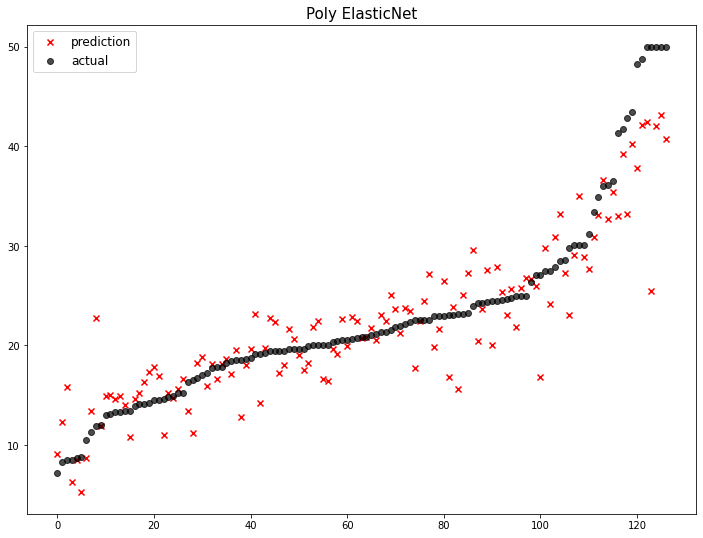

                       model        mse
0           Lasso(alpha=100)  78.644840
1            Lasso(alpha=10)  53.458274
2          MinMax ElasticNet  52.080500
3             Lasso(alpha=1)  35.348292
4   ElasticNet(l1_ratio=0.2)  30.665115
5   ElasticNet(l1_ratio=0.5)  30.556287
6   ElasticNet(l1_ratio=0.8)  30.233078
7           Ridge(alpha=100)  29.236838
8           Lasso(alpha=0.1)  26.611561
9            Ridge(alpha=10)  26.271048
10         Robust ElasticNet  25.960718
11       Standard ElasticNet  25.333287
12    No Standard ElasticNet  25.333287
13            Ridge(alpha=1)  25.274930
14         Lasso(alpha=0.01)  25.158275
15          LinearRegression  25.129814
16       Ridge(alpha=0.0001)  25.129787
17       Lasso(alpha=0.0001)  25.129737
18        Ridge(alpha=0.001)  25.129549
19        Lasso(alpha=0.001)  25.129406
20         Ridge(alpha=0.01)  25.127272
21          Ridge(alpha=0.1)  25.113636
22           Poly ElasticNet  17.801262


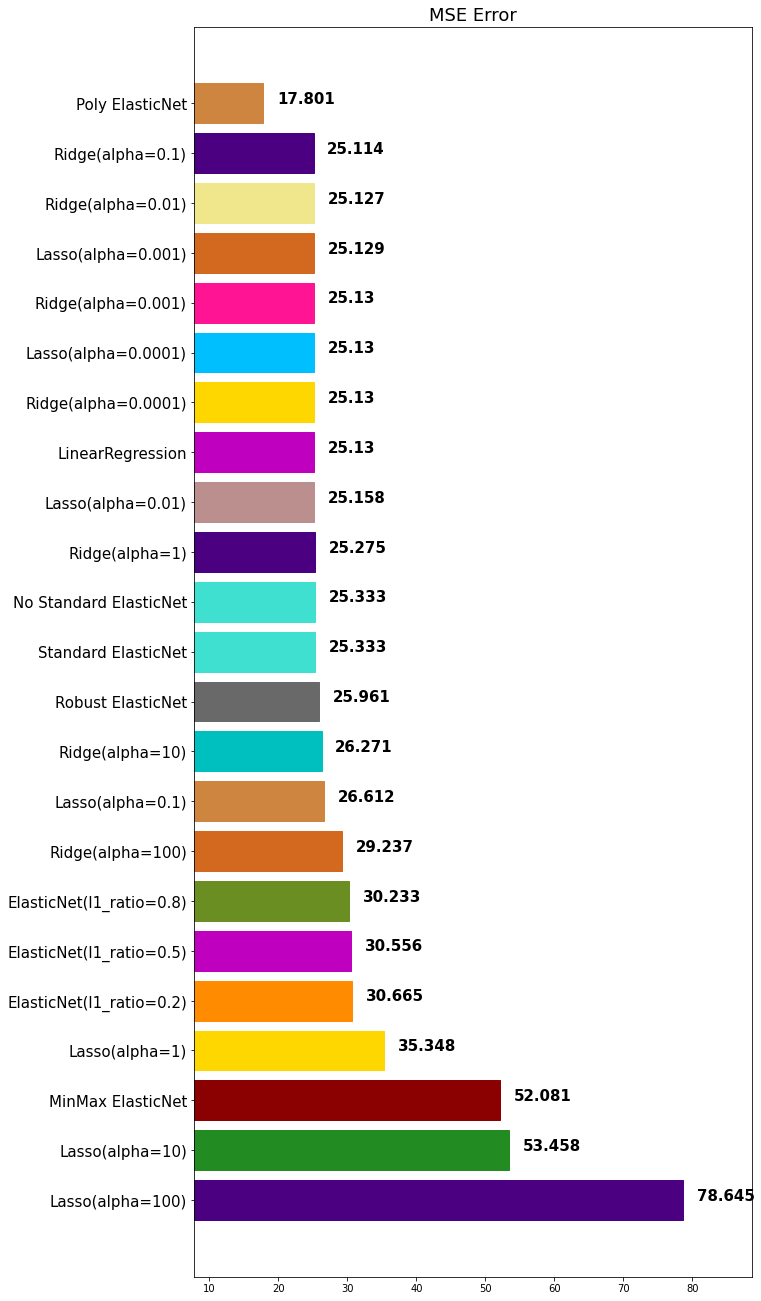

In [0]:
mse_eval('Poly ElasticNet', poly_pred, y_test)